In [143]:
# Final project-An Insight Look of US Historic Housing Prices

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [144]:
# Import Data Set
df= pd.read_csv('zillow-data.csv')

In [145]:
# Print top 10 largest cities' pricing data from 1/31/1996 to 4/30/2021
df.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1/31/1996,2/29/1996,...,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,190434.0,189885.0,...,637874.0,639948.0,641931.0,644189.0,646268.0,647855.0,648821.0,649353.0,650406.0,651786.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,189929.0,189905.0,...,779010.0,787907.0,798126.0,805830.0,813078.0,819458.0,825911.0,833538.0,841731.0,852648.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,94730.0,94846.0,...,197864.0,198874.0,200521.0,202096.0,204083.0,205962.0,208093.0,210180.0,211657.0,213375.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,161747.0,161246.0,...,271031.0,273042.0,275732.0,278415.0,280734.0,282811.0,284452.0,286969.0,289251.0,292302.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,95843.0,95809.0,...,192528.0,193604.0,195016.0,196781.0,198685.0,200798.0,202967.0,205550.0,208128.0,211597.0
5,13271,5,Philadelphia,City,PA,PA,Philadelphia-Camden-Wilmington,Philadelphia County,70966.0,70875.0,...,194621.0,197071.0,199284.0,201681.0,203891.0,206178.0,208231.0,210393.0,212607.0,215000.0
6,40326,6,Phoenix,City,AZ,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,97444.0,97739.0,...,280683.0,284564.0,289112.0,293961.0,299383.0,304851.0,311103.0,316899.0,323512.0,328883.0
7,18959,7,Las Vegas,City,NV,NV,Las Vegas-Henderson-Paradise,Clark County,149994.0,149871.0,...,299730.0,302407.0,306078.0,308893.0,311347.0,313434.0,315801.0,318489.0,321538.0,324738.0
8,54296,8,San Diego,City,CA,CA,San Diego-Carlsbad,San Diego County,176740.0,176380.0,...,684342.0,690571.0,700251.0,711194.0,722471.0,733769.0,745378.0,756552.0,767783.0,781916.0
9,38128,9,Dallas,City,TX,TX,Dallas-Fort Worth-Arlington,Dallas County,102088.0,102085.0,...,233407.0,234655.0,236189.0,239121.0,242321.0,245745.0,247155.0,249134.0,250976.0,254439.0


In [146]:
#Which city has the highest housing price for 4/30/2021
df[df['4/30/2021']==df['4/30/2021'].max()] 

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1/31/1996,2/29/1996,...,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021
22638,25239,26389,Indian Creek,City,FL,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,9639023.0,9484031.0,...,20000000.0,20400000.0,20700000.0,21100000.0,21200000.0,21600000.0,22000000.0,22500000.0,23200000.0,23900000.0


In [147]:
#Which city has the lowest housing price for 4/30/2021
df[df['4/30/2021']==df['4/30/2021'].min()] 

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1/31/1996,2/29/1996,...,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021
25217,24237,29449,Cotton Plant,City,AR,AR,NaN,Woodruff County,NaN,NaN,...,13059.0,13044.0,12986.0,12917.0,12851.0,12799.0,12838.0,12937.0,12992.0,13004.0


In [148]:
#What is the average US housing price for 4/30/2021
df['4/30/2021'].mean()


233238.34735351524

In [149]:
temp = df[df["SizeRank"] <= 300]
temp = temp.loc[:,'1/31/1996':'4/30/2021'].dropna()
temp['City Name'] = df['RegionName']


In [150]:
#Create a temp dataframe to store everage housing price for each US city from 1996 to 2021
holder = {}
for city in temp['City Name']:
    if city not in holder:
        holder[city] = {}
    holder[city] = temp.loc[temp['City Name'] == city].loc[:, temp.columns != 'City Name']
arr0 = []
for k, v in holder.items():
    temp_dict = {}
    for a in v.columns:
        if a[-4:] not in temp_dict:
            temp_dict[a[-4:]] = []
        temp_dict[a[-4:]].append(v[a])
    holder[k] = temp_dict
for k, v in holder.items():
    for a, b in v.items():
        v[a] = np.asarray(b).mean()
ldf = pd.DataFrame(holder)
ldf.head()


,New York,Los Angeles,Houston,Chicago,San Antonio,Philadelphia,Phoenix,Las Vegas,San Diego,Dallas,...,Murrieta,Temecula,Hemet,East Los Angeles,Joliet,Vallejo,Santa Clara,Town Of Amherst,Athens,Falls Church
1996,189048.833333,189954.416667,95428.500000,160510.166667,95863.500000,70547.083333,99990.000000,150655.500000,175165.916667,103177.583333,...,157465.666667,163197.083333,98369.333333,150857.750000,96143.916667,152980.666667,272870.500000,102515.250000,86797.583333,199737.333333
1997,193916.583333,189959.083333,96449.416667,159390.833333,96213.000000,71086.333333,105514.666667,154293.166667,176726.000000,105328.916667,...,161748.750000,166982.333333,98641.416667,149495.833333,98189.333333,154634.000000,306191.833333,100907.333333,91706.166667,197731.666667
1998,204216.666667,206036.500000,99680.166667,142584.333333,98489.166667,71129.750000,111505.333333,158513.500000,195534.916667,108851.833333,...,173854.583333,179368.000000,102634.166667,152193.250000,100857.833333,160860.916667,351978.083333,101353.583333,101895.000000,201886.083333
1999,220934.416667,228356.500000,104145.333333,159871.083333,101559.416667,72724.416667,119232.416667,162473.166667,217548.416667,114859.416667,...,190199.916667,198860.416667,108222.250000,156804.583333,104399.000000,173682.333333,387900.666667,103250.833333,108090.333333,211809.333333
2000,248485.166667,251362.083333,108353.333333,176524.916667,103191.916667,76029.583333,129001.000000,170735.166667,251107.500000,120781.500000,...,210174.000000,219885.500000,118645.916667,165522.666667,109307.833333,203963.000000,472469.166667,107173.333333,115396.000000,233338.666667


<AxesSubplot:ylabel='New York'>

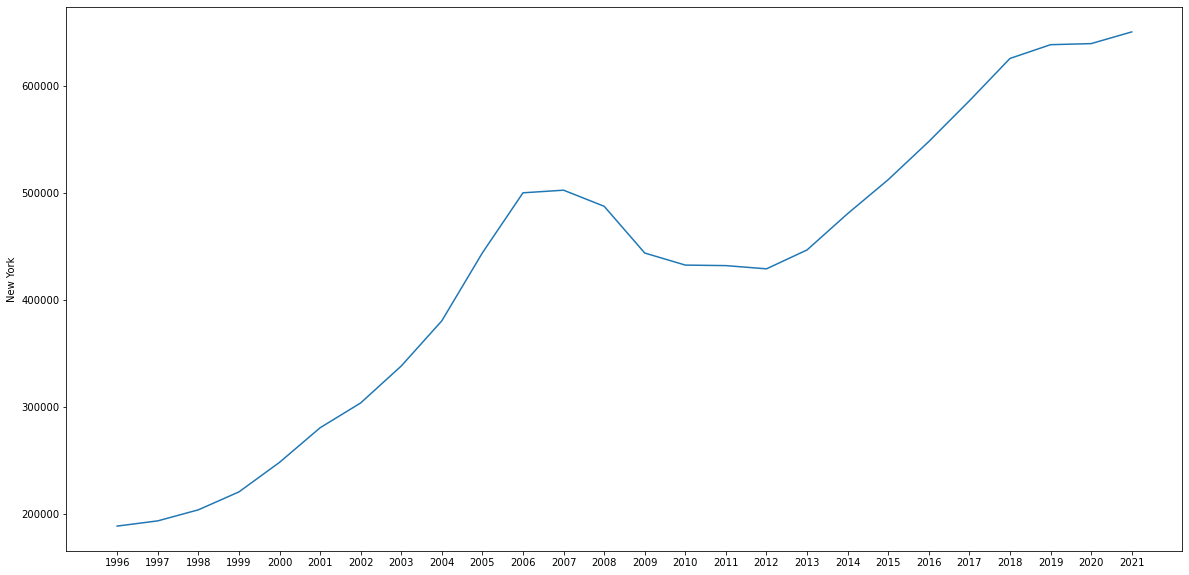

In [151]:
#New York average housing price changes from 1996 to 2021
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x=ldf.index, y='New York', data=ldf, ax=ax) 
#Based on below graph, New York housing prices were down during 2008 to 2013 and went up from 2014 to 2018 and became flat after that

<AxesSubplot:ylabel='Austin'>

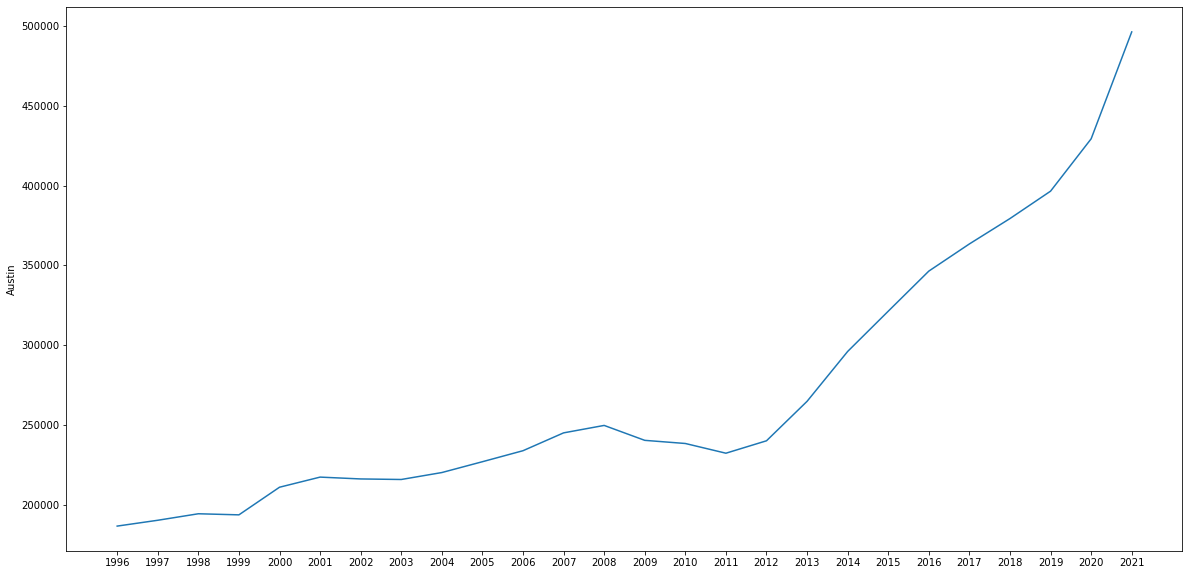

In [152]:
#Austin average housing price changes from 1996 to 2021
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x=ldf.index, y='Austin', data=ldf, ax=ax) 
#Based on below graph, Austin housing market was flat during 2008 housing crisis but started to jump from 2012;it has a steep jump starting from 2019

<AxesSubplot:ylabel='Dallas'>

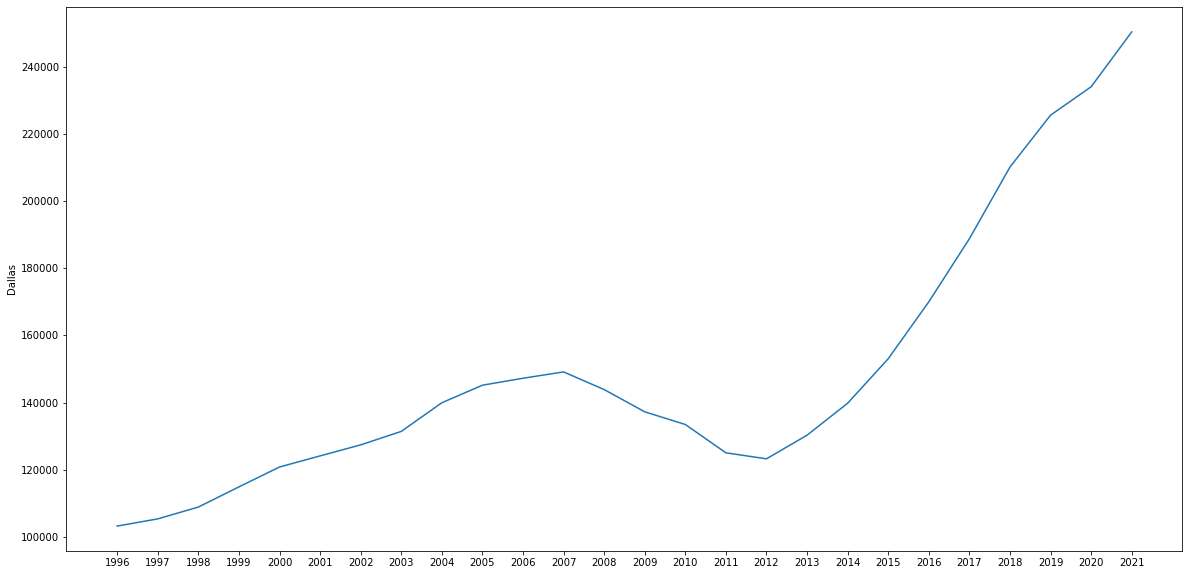

In [153]:
#Dallas average housing price changes from 1996 to 2021
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x=ldf.index, y='Dallas', data=ldf, ax=ax) 
#Based on below graph, Dallas housing experienced about 15% correction during 2008 housing crisis. It also started to move upfrom 2013; but the price increase was not as dramatically as Austin

<AxesSubplot:ylabel='San Jose'>

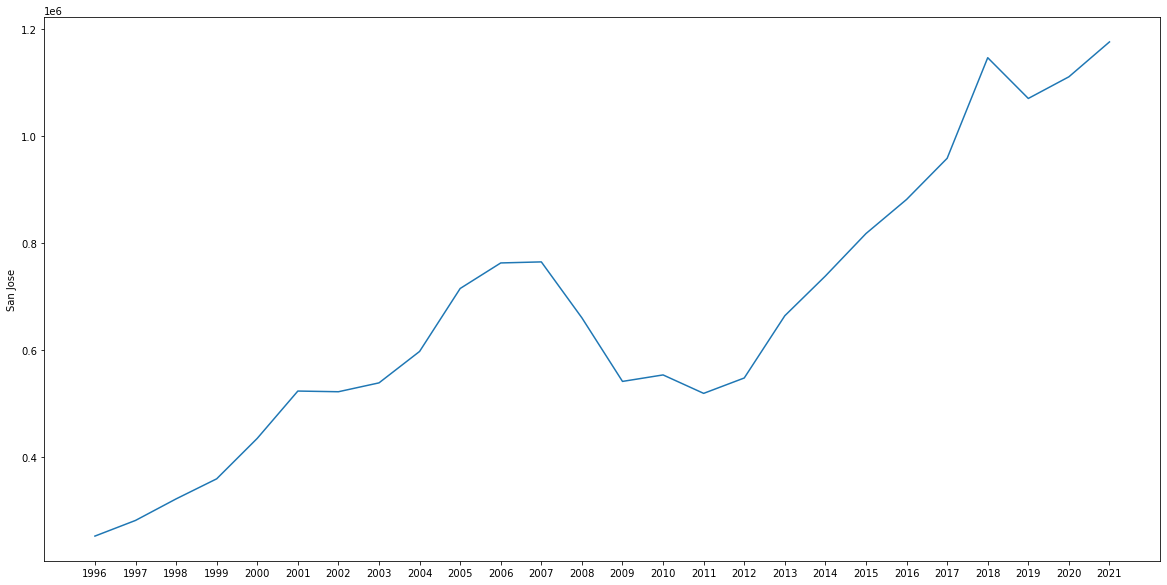

In [154]:
#San Jose average housing price changes from 1996 to 2021
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x=ldf.index, y='San Jose', data=ldf, ax=ax) 
#Based on below graph, San Jose experieced about 30% price drop during 2008 housing crisis; it started to move up after 2012 and currently average price is over 1.2 million

<AxesSubplot:ylabel='San Francisco'>

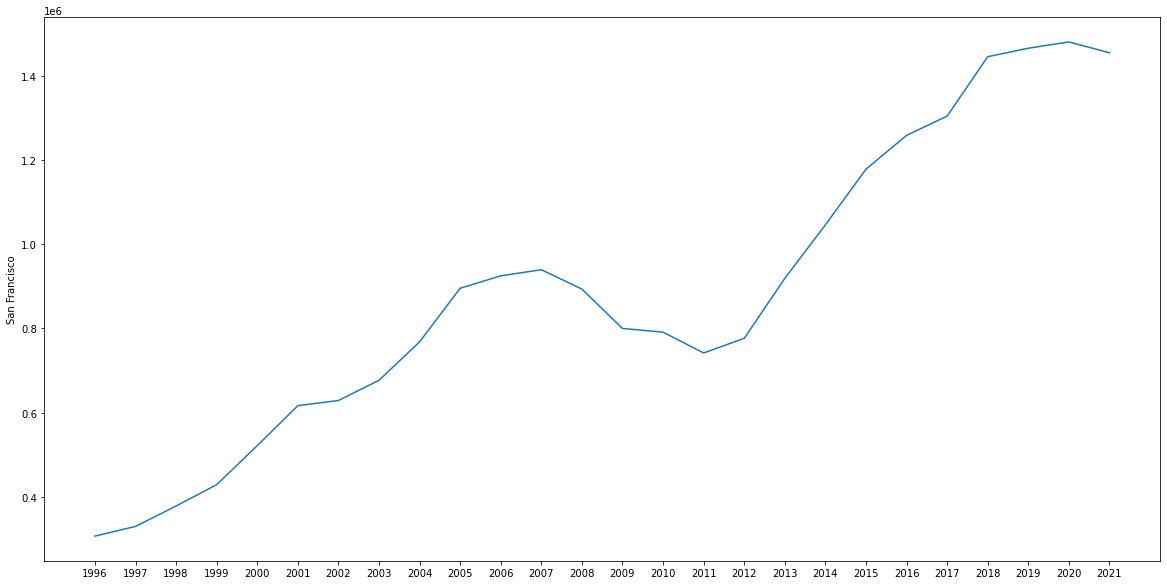

In [155]:
#San Francisco average housing price changes from 1996 to 2021
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x=ldf.index, y='San Francisco', data=ldf, ax=ax) 
#Based on below graph, San Francisco also exprienced 2008 price correction but was not as servere as San Jose. Its price started to move up after 2013 with average price about 1.5 million now

<AxesSubplot:ylabel='Seattle'>

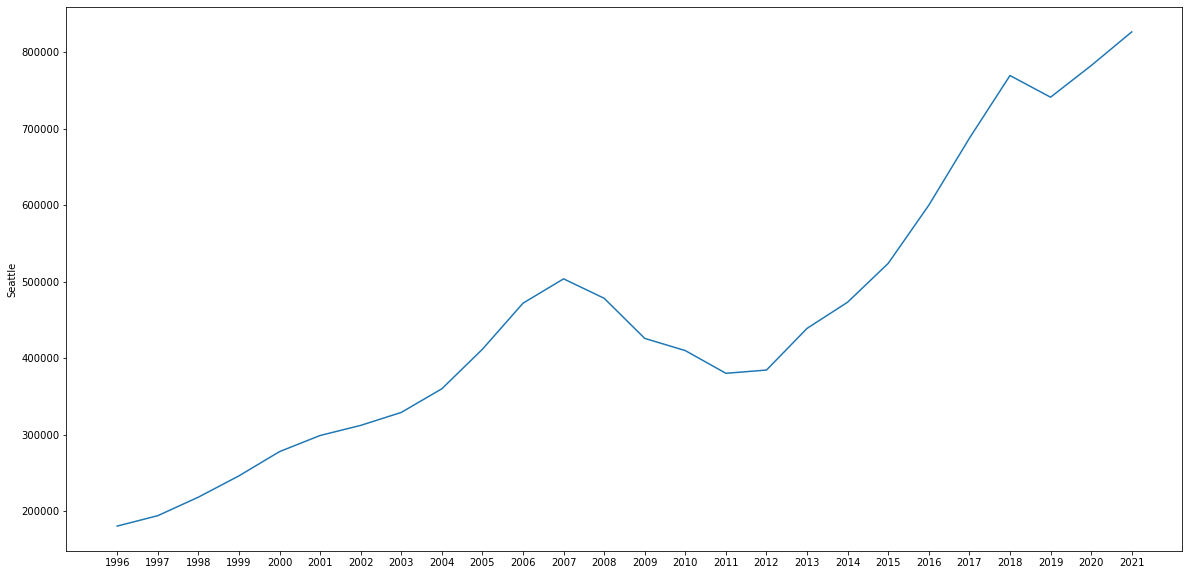

In [156]:
#Seattle average housing price changes from 1996 to 2021
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x=ldf.index, y='Seattle', data=ldf, ax=ax)
#Based on below graph, similar as San Jose, Seattle housing price also went down about 30% during 2008.It started to go up from 2013 and currently has average price around 0.85 million

<AxesSubplot:ylabel='Las Vegas'>

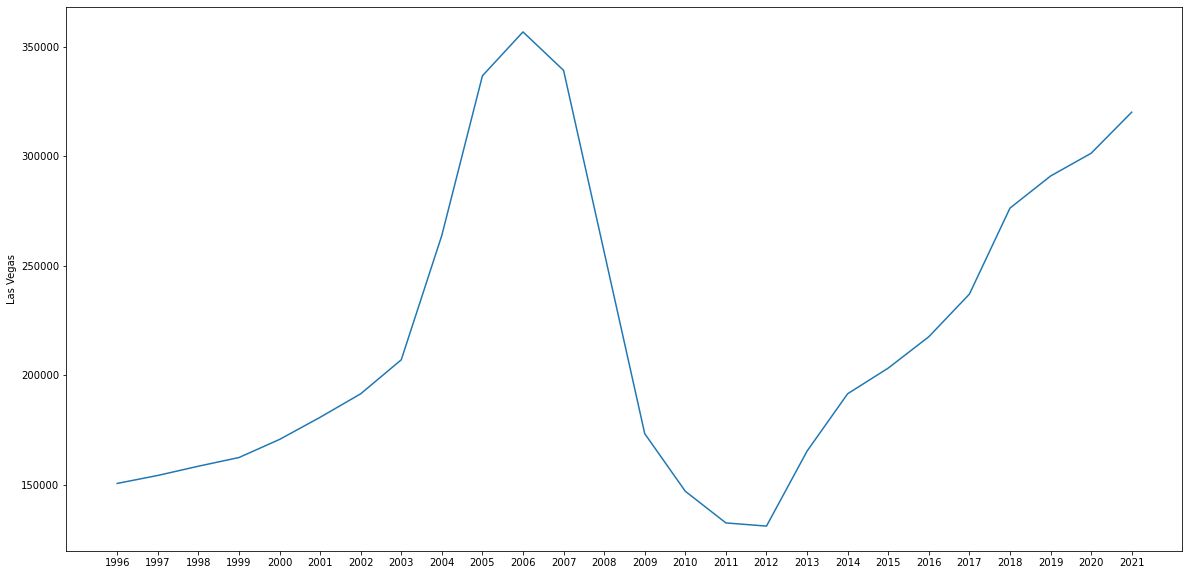

In [157]:
#Las Vegas average housing price changes from 1996 to 2021
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x=ldf.index, y='Las Vegas', data=ldf, ax=ax)
#Based on below graph,Las Vegas housing price went to peak in 2207 and lost almost 70% during 2008 downturn.It went up steadly afterwards